<a href="https://colab.research.google.com/github/mnshcodie/IIScEx_2021/blob/main/M3_AST_23_Pretrained_models_for_Oxford__IIIT_pet_dataset_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 23: Pre-Trained CNN Architectures for Computer Vision

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
  * How to use Pretrained CNN Architctures    
  * How to implement CNN on Oxford-IIIT pet dataset
  * How to use ResNet and GoogleNet Pytorch Models for Computer Vision tasks

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M3_AST_23_Pretrained_models_for_Oxford_IIIT_pet_dataset_B" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/oxfordiitimage.zip")
    ipython.magic("sx unzip oxfordiitimage.zip")
    ipython.magic("sx pip install --upgrade efficientnet-pytorch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Dataset Description

The Oxford-IIIT cats and dogs dataset consists pictures of cats and dogs 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed. There are about 200 images per category.

### Problem Statement
Given the cats and dogs images of 37 categories classify images using pretrained CNN architectures.

**ResNet Architectures**,
**GoogleNet**,
**EfficientNet** etc..


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os,shutil,glob,PIL
import pathlib
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
from torchvision import transforms,datasets,utils
import matplotlib.pyplot as plt
import torchvision.models as models
from efficientnet_pytorch import EfficientNet
import torch.optim as optim
from tqdm import tqdm

###Setting the batch size

In [ ]:
batch_size = 64

### Resizing the Images 
Here, we will resize the images to (224,224) and normalize them with mean and standard deviation.

In [ ]:
transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((-0.2027, -0.2547, -0.3395), (0.8459, 0.8474, 0.8403))])
# Choose the training dataset
train_data_folder = "/content/oxfordiitimage/train" # Train directory for loading images
train_data = datasets.ImageFolder(root=train_data_folder, transform=transformer)

Let us the load the images from the folder using DataLoader.

In [ ]:
#Load the dataset in batches using DataLoader
#YOUR CODE HERE

Calculation of mean and standard deviation of images for normalizing the images with Pytorch transformations

In [ ]:
#mean of train images
mean = 0.0
for img, _ in train_data:
  mean += img.mean([1,2])
mean = mean/len(train_data)
print(mean)

In [ ]:
#standard deviation of train images
sumel = 0.0
countel = 0
for img, _ in train_data:
    img = (img - mean.unsqueeze(1).unsqueeze(1))**2
    sumel += img.sum([1, 2])
    countel += torch.numel(img[0])
std = torch.sqrt(sumel/countel)
print(std)

Let us check the number of classes present in train data set

In [ ]:
len(train_data.classes)

Here we are checking for the availability of GPU 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
!nvidia-smi

## ImageNet Dataset

**ImageNet** is an image database containing 1000 categories and 1.2 million images, in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research. The data is available for free to researchers for non-commercial use.

### Transfer Learning
**Transfer learning** consists of taking features learned on one problem, and leveraging them on a new, similar problem.

Also, here we are using a **pre-trained model** which is a saved network that was previously trained on a ImageNet dataset,containing 

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. using ResNet50, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 37 probabilities in our case.


#### Explanation for ResNet - 50

Before moving ahead with Transfer Learning using ResNet, let us first try to understand about ResNet50 and it's architecture.

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

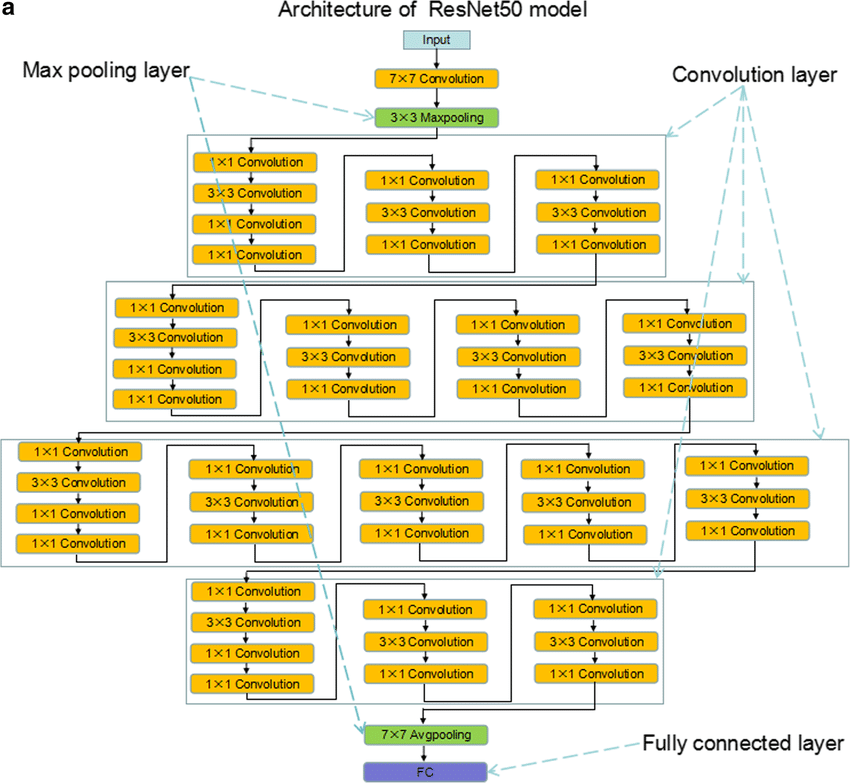

Since, now we are aware of ResNet50 and it's architecture, let us build the model.

In [ ]:
model_ft = models.resnet50(pretrained=True)
#set number of output features to 37
#YOUR CODE HERE
model_ft = model_ft.to(device)
print(model_ft)

We can see that ResNet50 model is downloaded and we tuned its number of ouput features to 37.

#### Implementing Adam Optimizer and Loss function 
Here, we will implement Adam optmizer using `torch.optim` module.

In [ ]:
# Defining optimizer and loss function
# YOUR CODE HERE

Let us create helper function to train function the images.

In [ ]:
# Empty list for saving train accuracy
# YOUR CODE HERE
# Empty list for saving train losses
# YOUR CODE HERE

def train(epoch):
  print('\nEpoch : %d'%epoch)
  # Initiate the model in training mode 
  # YOUR CODE HERE    
 
  running_loss=0
  correct=0
  total=0
 
  for data in tqdm(train_loader):
    # Loading the input tensors into CUDA GPU 
    # YOUR CODE HERE

    # Calculating the loss             
    # YOUR CODE HERE 
    
    # Back Propagation for calculaing gradients and adjusting weights 
    loss.backward()                   
    optimizer.step()
 
    running_loss += loss.item()
     
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
       
       
  # Calculating the mean of training loss and accuracy     
  # YOUR CODE HERE                           
   
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 20 epochs.

In [ ]:
epochs = 20
for epoch in range(1,epochs+1): 
  train(epoch)

We can see that after training for 20 epochs we got the accuracy 96%.

Now, let us save the trained model for inferencing in future.

In [ ]:
#Save the model to specified path
#YOUR CODE HERE

### Plotting the train accuracy and train loss vs epochs

#### Plot for train accuracy

In [ ]:
# YOUR CODE HERE

#### Plot for train loss

In [ ]:
# YOUR CODE HERE

Let us load the model weights using `load_state_dict` function

Note that `load_state_dict` function takes dictionary object ,not a path to saved object .This means that you must deserialize the saved `state_dict` before you pass it to the `load_state_dict()` function.

In [ ]:
#load the model
#YOUR CODE HERE

### Prediction of the images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

`model_ft.eval()` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and `.eval()` will do it for you

In [ ]:
model_ft.eval()

Here, we will resize the test images to (224,224) and normalize them with mean and standard deviation.

In [ ]:
transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((-0.2027, -0.2547, -0.3395), (0.8459, 0.8474, 0.8403))])
# Choose the testing dataset
# Load the images from test folder and apply transformations
#YOUR CODE HERE

Loading the images using `DataLoader()` with batch_size = 1 to be suitable for prediction

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

Here we are predicting images and comparing them with actual labels(Ground truth) for counting correct predictions

In [ ]:
predictions = []
labels = []
j = 0
for i,data in enumerate(test_loader):
  input,label = data
  output = model_ft(input.to(device))
  #Get the predictions
  #YOUR CODE HERE
  
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

### Accuracy of ResNet50 model on test dataset

In [ ]:
j/len(test_loader)

### Saving the labels(Ground truth) and prediction to a DataFrame for comaparing

In [ ]:
results = pd.DataFrame()
results['Labels'] = pd.Series(labels)
results['Predictions'] = pd.Series(predictions)

In [ ]:
#Here we are creating a column to show whether prediction is Correct/Wrong
#YOUR CODE HERE

###Saving the results to a csv file

In [ ]:
#Save the results to csv file
#YOUR CODE HERE

#### Count of correct predictions and wrong predictions

In [ ]:
#Get the count of correct and wrong predictions
#YOUR CODE HERE

### Explanation for GoogleNet
Before moving ahead with Transfer Learning using GoogleNet, let us first try to understand about GoogleNet and it's architecture.

GoogLeNet is a convolutional neural network that is 22 layers deep. You can load a pretrained version of the network trained on either the ImageNet data set. The network trained on ImageNet classifies images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. These networks have learned different feature representations for a wide range of images. The pretrained networks both have an image input size of 224-by-224.


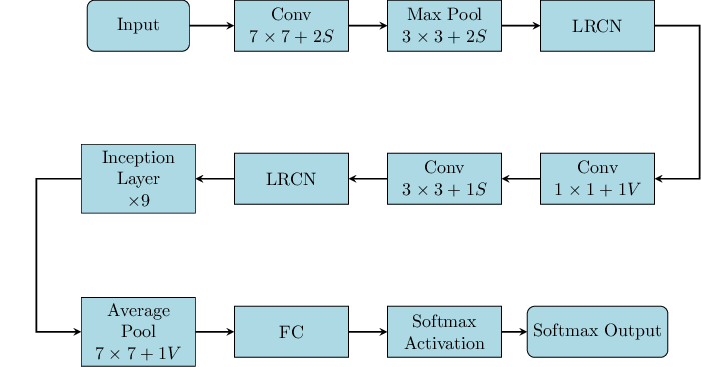

Since, now we are aware of GoogleNet and it's architecture, let us build the model.

In [ ]:
model_ft = models.googlenet(pretrained=True)
#set number of output features to 37
#YOUR CODE HERE
model_ft = model_ft.to(device)
print(model_ft)

#### Implementing Adam Optimizer and Loss function 
Here, we will implement Adam optmizer using `torch.optim` module.

In [ ]:
# Defining optimizer and loss function
# YOUR CODE HERE

Let us create helper function to train function the images.

In [ ]:
# Empty list for saving train accuracy
# YOUR CODE HERE
# Empty list for saving train losses
# YOUR CODE HERE

def train(epoch):
  print('\nEpoch : %d'%epoch)
  # Initiate the model in training mode 
  # YOUR CODE HERE    
 
  running_loss=0
  correct=0
  total=0
 
  for data in tqdm(train_loader):
    # Loading the input tensors into CUDA GPU 
    # YOUR CODE HERE

    # Calculating the loss             
    # YOUR CODE HERE 
    
    # Back Propagation for calculaing gradients and adjusting weights 
    loss.backward()                   
    optimizer.step()
 
    running_loss += loss.item()
     
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
       
       
  # Calculating the mean of training loss and accuracy     
  # YOUR CODE HERE                           
   
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 20 epochs.

In [ ]:
epochs = 20
for epoch in range(1,epochs+1): 
  train(epoch)

We can see that after training for 20 epochs we got the accuracy 96%.

Now, let us save the trained model for inferencing in future.

In [ ]:
#Save the model to specified path
#YOUR CODE HERE

### Plotting the train accuracy and train loss vs epochs

#### Plot for train accuracy

In [ ]:
# YOUR CODE HERE

#### Plot for train loss

In [ ]:
# YOUR CODE HERE

Let us load the model weights using `load_state_dict` function

Note that `load_state_dict` function takes dictionary object ,not a path to saved object .This means that you must deserialize the saved `state_dict` before you pass it to the `load_state_dict()` function.

In [ ]:
#load the model
#YOUR CODE HERE

### Prediction of the images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

`model_ft.eval()` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and `.eval()` will do it for you

In [ ]:
model_ft.eval()

Here, we will resize the test images to (224,224) and normalize them with mean and standard deviation.

In [ ]:
transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((-0.2027, -0.2547, -0.3395), (0.8459, 0.8474, 0.8403))])
# Choose the testing dataset
# Load the images from test folder and apply transformations
#YOUR CODE HERE

Loading the images using `DataLoader()` with batch_size = 1 to be suitable for prediction

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

Here we are predicting images and comparing them with actual labels(Ground truth) for counting correct predictions

In [ ]:
predictions = []
labels = []
j = 0
for i,data in enumerate(test_loader):
  input,label = data
  output = model_ft(input.to(device))
  #Get the predictions
  #YOUR CODE HERE
  
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

### Accuracy of GoogleNet model on test dataset

In [ ]:
j/len(test_loader)

### Saving the labels(Ground truth) and prediction to a DataFrame for comaparing

In [ ]:
results = pd.DataFrame()
results['Labels'] = pd.Series(labels)
results['Predictions'] = pd.Series(predictions)

In [ ]:
#Here we are creating a column to show whether prediction is Correct/Wrong
#YOUR CODE HERE

###Saving the results to a csv file

In [ ]:
#Save the results to csv file
#YOUR CODE HERE

#### Count of correct predictions and wrong predictions

In [ ]:
#Get the count of correct and wrong predictions
#YOUR CODE HERE

### Explanation for EfficientNet
Before moving ahead with Transfer Learning using EfficientNet, let us first try to understand about EfficientNet and it's architecture.

 In EfficientNet, the authors propose a new Scaling method called Compound Scaling. The long and short of it is this: The earlier models like ResNet follow the conventional approach of scaling the dimensions arbitrarily and by adding up more and more layers.

However, the paper proposes that if we scale the dimensions by a fixed amount at the same time and do so uniformly, we achieve much better performance. The scaling coefficients can be in fact decided by the user.

Though this scaling technique can be used for any CNN-based model, the authors started off with their own baseline model called EfficientNetB0. You can load a pretrained version of the network trained on either the ImageNet data set. The network trained on ImageNet classifies images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. These networks have learned different feature representations for a wide range of images. The pretrained networks both have an image input size of 224-by-224.
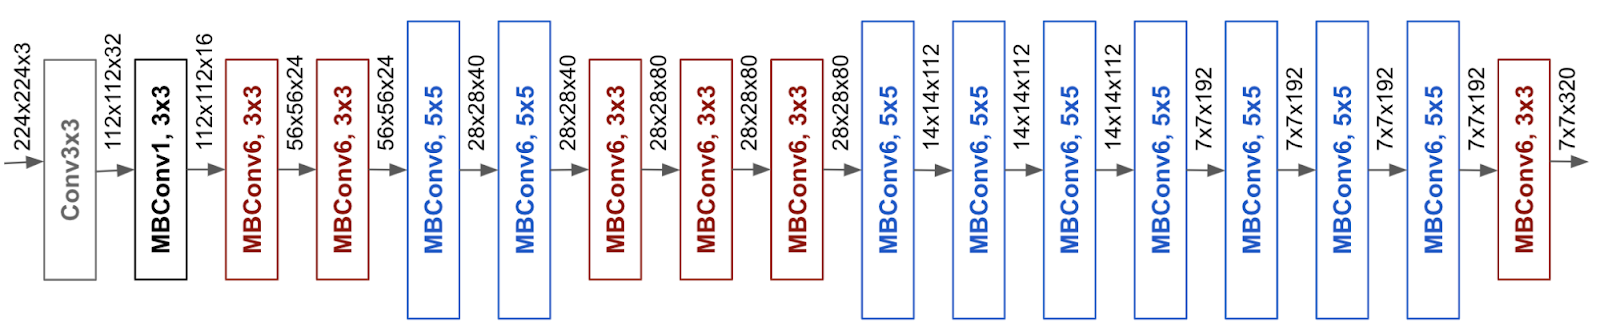

MBConv stands for mobile inverted bottleneck Convolution(similar to MobileNetv2).
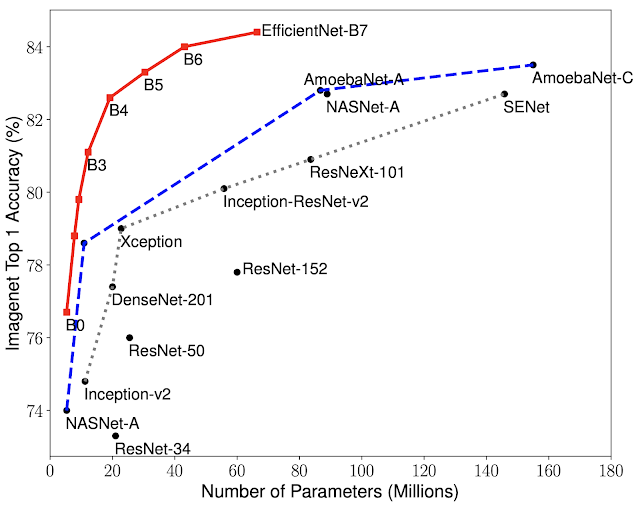


All EfficientNet models are scaled from our
baseline EfficientNet-B0

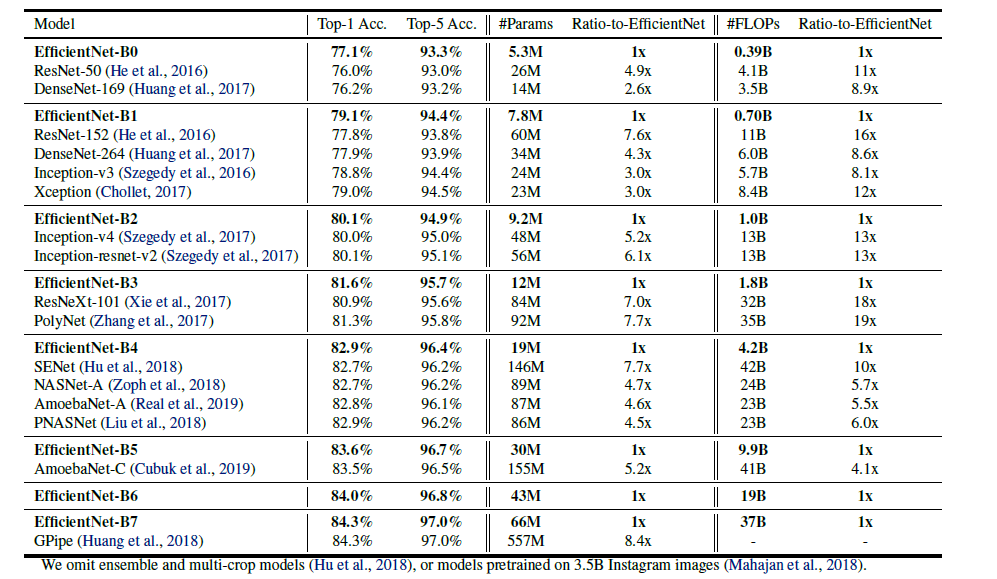

In [ ]:
model_name = 'efficientnet-b7'
#set number of output features to 37
#YOUR CODE HERE
model_ft = model_ft.to(device)
print(model_ft)

#### Implementing Adam Optimizer and Loss function 
Here, we will implement Adam optmizer using `torch.optim` module.

In [ ]:
# Defining optimizer and loss function
# YOUR CODE HERE

Let us create helper function to train function the images.

In [ ]:
# Empty list for saving train accuracy
# YOUR CODE HERE
# Empty list for saving train losses
# YOUR CODE HERE

def train(epoch):
  print('\nEpoch : %d'%epoch)
  # Initiate the model in training mode 
  # YOUR CODE HERE    
 
  running_loss=0
  correct=0
  total=0
 
  for data in tqdm(train_loader):
    # Loading the input tensors into CUDA GPU 
    # YOUR CODE HERE

    # Calculating the loss             
    # YOUR CODE HERE 
    
    # Back Propagation for calculaing gradients and adjusting weights 
    loss.backward()                   
    optimizer.step()
 
    running_loss += loss.item()
     
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
       
       
  # Calculating the mean of training loss and accuracy     
  # YOUR CODE HERE                           
   
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 20 epochs.

In [ ]:
epochs = 20
for epoch in range(1,epochs+1): 
  train(epoch)

We can see that after training for 20 epochs we got the accuracy 96%.

Now, let us save the trained model for inferencing in future.

In [ ]:
#Save the model to specified path
#YOUR CODE HERE

### Plotting the train accuracy and train loss vs epochs

#### Plot for train accuracy

In [ ]:
# YOUR CODE HERE

#### Plot for train loss

In [ ]:
# YOUR CODE HERE

Let us load the model weights using `load_state_dict` function

Note that `load_state_dict` function takes dictionary object ,not a path to saved object .This means that you must deserialize the saved `state_dict` before you pass it to the `load_state_dict()` function.

In [ ]:
#load the model
#YOUR CODE HERE

### Prediction of the images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

`model_ft.eval()` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and `.eval()` will do it for you

In [ ]:
model_ft.eval()

Here, we will resize the test images to (224,224) and normalize them with mean and standard deviation.

In [ ]:
transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((-0.2027, -0.2547, -0.3395), (0.8459, 0.8474, 0.8403))])
# Choose the testing dataset
# Load the images from test folder and apply transformations
#YOUR CODE HERE

Loading the images using `DataLoader()` with batch_size = 1 to be suitable for prediction

In [ ]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

Here we are predicting images and comparing them with actual labels(Ground truth) for counting correct predictions

In [ ]:
predictions = []
labels = []
j = 0
for i,data in enumerate(test_loader):
  input,label = data
  output = model_ft(input.to(device))
  #Get the predictions
  #YOUR CODE HERE
  
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

### Accuracy of EfficientNet model on test dataset

In [ ]:
j/len(test_loader)

### Saving the labels(Ground truth) and prediction to a DataFrame for comaparing

In [ ]:
results = pd.DataFrame()
results['Labels'] = pd.Series(labels)
results['Predictions'] = pd.Series(predictions)

In [ ]:
#Here we are creating a column to show whether prediction is Correct/Wrong
#YOUR CODE HERE

###Saving the results to a csv file

In [ ]:
#Save the results to csv file
#YOUR CODE HERE

#### Count of correct predictions and wrong predictions

In [ ]:
#Get the count of correct and wrong predictions
#YOUR CODE HERE

### Please answer the questions below to complete the experiment:




#### Consider the following statements about Transfer learning and answer Q1.

A. Transfer learning enables feature extraction with pre-trained deep learning models.

B. When target labels are scarce, the weights of pre-trained models are frozen (fix weights) so as to avoid overfitting.

C. Fine-tuning of pre-trained model weights is generally preferred when target task labels are scarce .

D. Transfer learning works better when the tasks on which the networks are trained for are similar.

In [ ]:
#@title Which of the above statements is/are True regrading transfer learning?
Answer1 = "" #@param ["","Only A","Only B","Only D","A and D ","B and C"]


#### Consider the following statements about 1x1 convolution and answer Q2.

A. A convolutional layer with a 1×1 filter can, therefore, be used at any point in a convolutional neural network to control the number of feature maps

B. The projection created by a 1×1 convolution can act like channel-wise pooling

C. The projection created by a 1×1 convolution can be used for dimensionality reduction

D. Global Average Pooling

In [ ]:
#@title Which of the above statements is/are True regrading 1x1 convolution?
Answer2 = "" #@param ["","Only B and C","Only A and D","B, C and D","A, B and C"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")